In [13]:
import pandas as pd
df = pd.read_csv("kelulusan_mahasiswa.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 452.0 bytes
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1


IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64


<Axes: xlabel='IPK'>

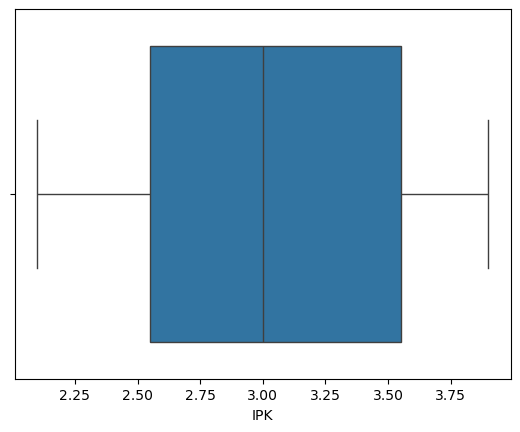

In [2]:
print(df.isnull().sum())
df = df.drop_duplicates()

import seaborn as sns
sns.boxplot(x=df['IPK'])

             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus
count  10.000000        10.00000          10.000000  10.000000
mean    3.030000         6.00000           6.400000   0.500000
std     0.639531         3.05505           3.306559   0.527046
min     2.100000         2.00000           2.000000   0.000000
25%     2.550000         4.00000           4.000000   0.000000
50%     3.000000         5.50000           6.000000   0.500000
75%     3.550000         7.75000           8.750000   1.000000
max     3.900000        12.00000          12.000000   1.000000


<Axes: >

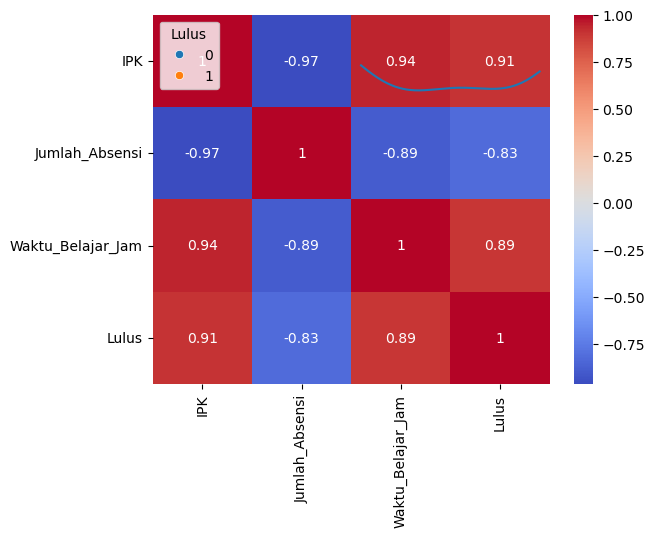

In [5]:
print(df.describe())
sns.histplot(df['IPK'], bins=10, kde=True)
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [11]:
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']
df.to_csv("processed_kelulusan.csv", index=False)
df.head()

,IPK,Jumlah_Absensi,Waktu_Belajar_Jam,Lulus,Rasio_Absensi,IPK_x_Study
0,3.8,3,10,1,0.214286,38.0
1,2.5,8,5,0,0.571429,12.5
2,3.4,4,7,1,0.285714,23.8
3,2.1,12,2,0,0.857143,4.2
4,3.9,2,12,1,0.142857,46.8


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Lulus', axis=1)
y = df['Lulus']

# split pertama: train (70%) + temp (30%)  — pakai stratify supaya proporsi kelas terjaga
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# split kedua: val & test — TIDAK pakai stratify (karena y_temp terlalu kecil)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)
print("y_train counts:\n", y_train.value_counts())
print("y_val counts:\n", y_val.value_counts())
print("y_test counts:\n", y_test.value_counts())


Shapes: (7, 5) (1, 5) (2, 5)
y_train counts:
 Lulus
1    4
0    3
Name: count, dtype: int64
y_val counts:
 Lulus
1    1
Name: count, dtype: int64
y_test counts:
 Lulus
0    2
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Lulus', axis=1)
y = df['Lulus']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# cek jumlah sampel tiap kelas di y_temp
vc = y_temp.value_counts()
print("Counts in y_temp:\n", vc)

if vc.min() >= 2:
    # aman pakai stratify
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
else:
    # fallback: split tanpa stratify
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)
print("y_train counts:\n", y_train.value_counts())
print("y_val counts:\n", y_val.value_counts())
print("y_test counts:\n", y_test.value_counts())


Counts in y_temp:
 Lulus
0    2
1    1
Name: count, dtype: int64
Shapes: (7, 5) (1, 5) (2, 5)
y_train counts:
 Lulus
1    4
0    3
Name: count, dtype: int64
y_val counts:
 Lulus
1    1
Name: count, dtype: int64
y_test counts:
 Lulus
0    2
Name: count, dtype: int64


In [15]:
import pandas as pd

X_train = pd.read_csv("X_train.csv")
X_val   = pd.read_csv("X_val.csv")
X_test  = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").squeeze("columns")
y_val   = pd.read_csv("y_val.csv").squeeze("columns")
y_test  = pd.read_csv("y_test.csv").squeeze("columns")

print(X_train.shape, X_val.shape, X_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'X_train.csv'